# Machine Learning - Assignment 1

## Naive Bayes Learning algorithm, Cross-validation, and ROC-Curves

The aim of the assignment is to implement:

* Naive Bayes learning algorithm for binary classification tasks
* Visualization to plot a ROC-curve
* A cross-validation test
* Visualization of the average ROC-curve of a cross-validation test

Follow the instructions and implement what is missing to complete the assignment. Some functions have been started to help you a little bit with the inputs or outputs of the function.

**Note:** You might need to go back and forth during your implementation of the code. The structure is set up to make implementation easier, but how you return values from the different functions might vary, and you might find yourself going back and change something to make it easier later on.

## Assignment preparations

We help you out with importing the libraries and reading the data.

Look at the output to get an idea of how the data is structured.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from colorama import Fore, Style
from math import e, pi, sqrt

In [2]:
data = pd.read_csv("iris.csv").to_numpy()

mapped, index, unique_arr = np.unique(data[:, -1], return_index=True, return_inverse=True)
data[:, -1] = unique_arr
np.random.shuffle(data)

print("Le tableau complet (quelques lignes) :")
print(data[:5])
print("mapped =", mapped)
print("index =", index)

Le tableau complet (quelques lignes) :
[[5.7 3.0 4.2 1.2 1]
 [5.8 2.7 5.1 1.9 2]
 [5.7 2.8 4.5 1.3 1]
 [6.2 2.9 4.3 1.3 1]
 [6.0 2.2 5.0 1.5 2]]
mapped = ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
index = [  0  50 100]


# Definition of data class

In [3]:
class Data_set:
    def __init__(self, name):
        self.name = name
        self.data = None     # shape (N,5) => 4 features + 1 label
        self.features = None # shape (N,4)
        self.labels = None   # shape (N,)
        # Pour Naive Bayes
        self.means = None
        self.std_devs = None
        self.prior = None

    def class_split(self):
        """
        Sépare self.data en 2 tableaux : self.features (les 4 1ères colonnes)
        et self.labels (la dernière colonne).
        """
        if self.data is None:
            print(f"[{self.name}] Pas de data !")
            return
        self.features = self.data[:, :-1].astype(float)
        self.labels   = self.data[:, -1].astype(int)

    def display_features_and_labels(self):
        print(f"{self.name}: Features ->\n", self.features)
        print(f"{self.name}: Labels   ->\n", self.labels)

In [4]:
class Flower:
    def __init__(self, name):
        self.name = name
        self.data = None   # Les données brutes (N,5)
        self.test_size = 0.2
        self.train = Data_set(name + " Train")
        self.test  = Data_set(name + " Test")

    def train_test_split(self):
        """
        Sépare self.data en un train set et un test set selon test_size.
        """
        if self.data is None:
            print(f"[{self.name}] Pas de data pour split !")
            return

        N = len(self.data)
        split_index = int(N * (1 - self.test_size))
        self.train.data = self.data[:split_index]
        self.test.data  = self.data[split_index:]

    def display_training(self):
        """
        Affiche la séparation brute (avant split en features/labels).
        """
        print(Fore.RED + self.name + Style.RESET_ALL)
        print("=== TRAIN DATA ===")
        print(self.train.data)
        print("=== TEST DATA ===")
        print(self.test.data)

    def class_split_automation(self):
        """
        Automatisation : appelle la fonction class_split() sur le train et test,
        puis affiche pour vérification.
        """
        print(Fore.RED + self.name + Style.RESET_ALL)
        self.train.class_split()
        self.test.class_split()
        self.train.display_features_and_labels()
        self.test.display_features_and_labels()

In [5]:
iris_setosa = Flower("Setosa")
iris_versicolor = Flower("Versicolor")
iris_virginica  = Flower("Virginica")

# On sépare : setosa.data, versicolor.data, virginica.data
# à l'aide des index qu'on a trouvés (index[1:] = positions où les classes changent)
iris_setosa.data, iris_versicolor.data, iris_virginica.data = np.split(data, index[1:])

# Petit aperçu
print("\n--- Aperçu de la classe Setosa (3 premières lignes) ---")
print(iris_setosa.data[:3])


--- Aperçu de la classe Setosa (3 premières lignes) ---
[[5.7 3.0 4.2 1.2 1]
 [5.8 2.7 5.1 1.9 2]
 [5.7 2.8 4.5 1.3 1]]


## Data handling functions

As a start, we are going to implement some basic data handling functions to use in the future.

### 1) Split class into a train and test set

First, we need to be able to split the class into a train and test set.

In [6]:
iris_setosa.train_test_split()
iris_versicolor.train_test_split()
iris_virginica.train_test_split()

# Test d'affichage
iris_setosa.display_training()
iris_versicolor.display_training()
iris_virginica.display_training()

Setosa
=== TRAIN DATA ===
[[5.7 3.0 4.2 1.2 1]
 [5.8 2.7 5.1 1.9 2]
 [5.7 2.8 4.5 1.3 1]
 [6.2 2.9 4.3 1.3 1]
 [6.0 2.2 5.0 1.5 2]
 [6.4 2.9 4.3 1.3 1]
 [5.8 2.7 4.1 1.0 1]
 [5.0 3.4 1.5 0.2 0]
 [6.3 2.9 5.6 1.8 2]
 [6.3 3.3 6.0 2.5 2]
 [6.1 2.8 4.7 1.2 1]
 [7.6 3.0 6.6 2.1 2]
 [4.4 3.2 1.3 0.2 0]
 [6.3 2.5 5.0 1.9 2]
 [5.2 2.7 3.9 1.4 1]
 [5.6 2.5 3.9 1.1 1]
 [6.8 3.0 5.5 2.1 2]
 [6.7 3.0 5.2 2.3 2]
 [6.7 3.3 5.7 2.1 2]
 [6.5 3.0 5.5 1.8 2]
 [6.1 2.9 4.7 1.4 1]
 [5.5 2.6 4.4 1.2 1]
 [6.3 3.3 4.7 1.6 1]
 [5.1 3.8 1.6 0.2 0]
 [6.1 3.0 4.6 1.4 1]
 [7.2 3.6 6.1 2.5 2]
 [6.5 3.0 5.2 2.0 2]
 [4.9 2.5 4.5 1.7 2]
 [5.1 2.5 3.0 1.1 1]
 [5.4 3.4 1.7 0.2 0]
 [6.7 3.0 5.0 1.7 1]
 [4.7 3.2 1.3 0.2 0]
 [7.3 2.9 6.3 1.8 2]
 [6.7 3.1 5.6 2.4 2]
 [6.6 2.9 4.6 1.3 1]
 [5.1 3.5 1.4 0.2 0]
 [7.2 3.0 5.8 1.6 2]
 [5.2 3.5 1.5 0.2 0]
 [4.8 3.0 1.4 0.1 0]
 [5.8 2.8 5.1 2.4 2]]
=== TEST DATA ===
[[4.9 3.1 1.5 0.1 0]
 [5.6 2.9 3.6 1.3 1]
 [5.1 3.4 1.5 0.2 0]
 [5.9 3.0 4.2 1.5 1]
 [5.7 2.6 3.5 1.0 1]
 [6.3 2.8 

### 2) Split data into features and labels

The data as shown above is not always the optimal shape. To help us keep track of things, we can split the data into its features and labels seperately.

Each class is 4 features and 1 label in the same array: 

* **[feature 1, feature 2, feature 3, feature 4, label]**

It would help us later to have the features and labels in seperate arrays in the form: 

* **[feature 1, feature 2, feature 3, feature 4]** and **[label]**

Here you are going to implement this functionallity.

We should first test the "**class_split**" function on one of the classes above (iris_setosa, etc...) to make sure it works properly.

In [7]:
print("\n--- Après class_split_automation() ---")
iris_setosa.class_split_automation()
iris_versicolor.class_split_automation()
iris_virginica.class_split_automation()


--- Après class_split_automation() ---
Setosa
Setosa Train: Features ->
 [[5.7 3.  4.2 1.2]
 [5.8 2.7 5.1 1.9]
 [5.7 2.8 4.5 1.3]
 [6.2 2.9 4.3 1.3]
 [6.  2.2 5.  1.5]
 [6.4 2.9 4.3 1.3]
 [5.8 2.7 4.1 1. ]
 [5.  3.4 1.5 0.2]
 [6.3 2.9 5.6 1.8]
 [6.3 3.3 6.  2.5]
 [6.1 2.8 4.7 1.2]
 [7.6 3.  6.6 2.1]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [5.2 2.7 3.9 1.4]
 [5.6 2.5 3.9 1.1]
 [6.8 3.  5.5 2.1]
 [6.7 3.  5.2 2.3]
 [6.7 3.3 5.7 2.1]
 [6.5 3.  5.5 1.8]
 [6.1 2.9 4.7 1.4]
 [5.5 2.6 4.4 1.2]
 [6.3 3.3 4.7 1.6]
 [5.1 3.8 1.6 0.2]
 [6.1 3.  4.6 1.4]
 [7.2 3.6 6.1 2.5]
 [6.5 3.  5.2 2. ]
 [4.9 2.5 4.5 1.7]
 [5.1 2.5 3.  1.1]
 [5.4 3.4 1.7 0.2]
 [6.7 3.  5.  1.7]
 [4.7 3.2 1.3 0.2]
 [7.3 2.9 6.3 1.8]
 [6.7 3.1 5.6 2.4]
 [6.6 2.9 4.6 1.3]
 [5.1 3.5 1.4 0.2]
 [7.2 3.  5.8 1.6]
 [5.2 3.5 1.5 0.2]
 [4.8 3.  1.4 0.1]
 [5.8 2.8 5.1 2.4]]
Setosa Train: Labels   ->
 [1 2 1 1 2 1 1 0 2 2 1 2 0 2 1 1 2 2 2 2 1 1 1 0 1 2 2 2 1 0 1 0 2 2 1 0 2
 0 0 2]
Setosa Test: Features ->
 [[4.9 3.1 1.5 0.1]
 [5.6 2.9 

We should also try to **1)** first split a class into a train and test set, **2)** split each of these two into features and abels. In total there should be 4 arrays (2 feature and 2 label arrays).

Think a bit before going to the next task, what can easily go wrong in the above code?

## Naive Bayes learning algorithm

When implementing the Navie Bayes learning algorithm, we can break it down into a few components.

We will implement these components one at a time.

### 3) Calculate feature statistics

First, we need to implement a function that returns feature statistics (means, standard deviation, priors) for a given set of feature data for a single class. This is the equivalent of "training" the naive bayes model.

**Note 1:** Each feature gets its own mean and standard deviation!

**Note 2:** The way you structure the functions (what is returned) shapes the remainder of the assignment.

In [8]:
def calculate_feature_statistics(feature_data):
    """
    feature_data: shape (N,4)
    Retourne la moyenne et l'écart-type par feature (shape(4,))
    """
    feature_data = np.array(feature_data, dtype=float)
    means = np.mean(feature_data, axis=0)
    std_devs = np.std(feature_data, axis=0, ddof=1)  # ddof=1 => écart-type échantillon
    return means, std_devs

To make sure the function works, we should test it before proceding.

In [9]:
iris_setosa.train.means, iris_setosa.train.std_devs = calculate_feature_statistics(iris_setosa.train.features)
iris_versicolor.train.means, iris_versicolor.train.std_devs = calculate_feature_statistics(iris_versicolor.train.features)
iris_virginica.train.means, iris_virginica.train.std_devs = calculate_feature_statistics(iris_virginica.train.features)

print(f"\nSetosa train means = {iris_setosa.train.means}")
print(f"Setosa train stds  = {iris_setosa.train.std_devs}")


Setosa train means = [5.985  2.9825 4.26   1.385 ]
Setosa train stds  = [0.78202564 0.33656447 1.58159284 0.72626547]


### 4) Gaussian probability density function (Gaussian PDF)

Now we need to implement the gaussian probability density function to use for a single datapoint.

**Note:** Look at the imports in the first cell at the top, it has some math numbers for easy use here. 

In [10]:
def gaussian_probability_density_function(x, means, stdevs):
    """
    x: shape(4,) => un seul datapoint
    means, stdevs: shape(4,)
    Retourne la PDF = produit de la PDF gaussienne sur chaque feature.
    """
    # On évite la division par zéro
    stdevs_no_zero = np.where(stdevs==0, 1e-6, stdevs)
    #stdevs_no_zero = np.where(stdevs==0, np.mean(stdevs), stdevs)

    exponent = np.exp(-((x - means) ** 2) / (2 * stdevs_no_zero**2))
    coeff    = 1 / (np.sqrt(2*pi) * stdevs_no_zero)
    pdf_vals = coeff * exponent
    # On multiplie sur les 4 features => scalaire
    return np.prod(pdf_vals)

### 5) Testing Gaussian PDF

We should test it to make sure it works. Train it, using the "calculate_feature_statistics" function, on one of the dataset classes. Then, take one datapoint from the same class and use naive bayes gaussian to make a prediction.

In [11]:
sample_x = iris_setosa.train.features[0]
pdf_value = gaussian_probability_density_function(sample_x,
                                                  iris_setosa.train.means,
                                                  iris_setosa.train.std_devs)
print(f"\nExemple PDF sur un point setosa: {pdf_value}")

# Compare avec un point d'une autre classe
sample_x_other = iris_versicolor.train.features[0]
pdf_value_other = gaussian_probability_density_function(sample_x_other,
                                                        iris_setosa.train.means,
                                                        iris_setosa.train.std_devs)
print(f"Exemple PDF sur un point versicolor (mais stats setosa): {pdf_value_other}")


Exemple PDF sur un point setosa: 0.07574099567829007
Exemple PDF sur un point versicolor (mais stats setosa): 0.040792868553127914


As a test, take one datapoint from one of the other classes and see if the predicted probability changes.

Think a bit why the probability changes, what could affect the prediction?

## Prepare Naive Bayes for binary classification

### 6) Prepare the data for inference

Before we train and test the naive bayes for multiple classes, we should get our data in order.

Similar to how we did previously, we should now split two classes into a train and test set, you may choose which two classes freely.

### 7) Class A vs Class B for binary classification

**Note:** You might need to go back and forth a bit in the following cells during your implementation of your code.

We have to get the probability from two sets of classes and compare the two probabilities in order to make a propper prediction.

Here we will implement two functions to make this possible. We seperate these functions to make the implementation of the ROC-curve easier later on.

**Function 1: naive_bayes_prediction** 
* A function that returns the probabilities for each class the model for a single datapoint.

**Function 2: probabilities_to_prediction**
* A function that takes in probabilities and returns a prediction.

In [12]:
def naive_bayes_prediction(means, std_devs, prior, x):
    """
    Calcule la vraisemblance P(x | classe) * prior
    = gaussian_probability_density_function(x, means, std_devs) * prior
    """
    likelihood = gaussian_probability_density_function(x, means, std_devs)
    return prior * likelihood

In [13]:
def probabilities_to_prediction(probA, probB):
    """
    Retourne la "classe" (0 ou 1) selon la plus grande prob.
    probA correspond à la classe A, probB à la classe B
    """
    return 0 if probA > probB else 1

To test the function we need the feature metrics from the classes we choose. 

**Note:** Choose the correct train/test set and the correct feature/label split!

In [14]:
# TODO: Get the feature metrics for the classes.

Now we should have implemented all the neccessary parts to train a naive bayes algorithm and do inference on it. Implement a small test workflow for two of your chosen classes.

In [15]:
# TODO: Test the "naive_bayes_prediction" function and implement all neccessary code for it to work.

# TODO: Print the predicted class and the actual class for the test set

n_setosa = len(iris_setosa.train.features)
n_versi  = len(iris_versicolor.train.features)
n_virgi  = len(iris_virginica.train.features)

total    = n_setosa + n_versi + n_virgi

iris_setosa.train.prior = n_setosa / total
iris_versicolor.train.prior = n_versi / total

print(f"\nSetosa prior = {iris_setosa.train.prior:.2f}")
print(f"Versicolor prior = {iris_versicolor.train.prior:.2f}")

# On suppose A=Setosa => label=0, B=Versicolor => label=1 (ou inverse, peu importe, il faut être cohérent plus tard)


Setosa prior = 0.33
Versicolor prior = 0.33


## ROC-curve

A ROC curve, or *Receiver Operating Characteristic curve*, is a graphical plot that illustrates the performance of a binary classifier such as our Naive Bayes model.

More info can be found in the course material and here: [https://en.wikipedia.org/wiki/Receiver_operating_characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

Another good illustration by Google can be found here: [https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Now that we have a prediction model, we would want to try it out and test it using a ROC-curve.

### 8) True Positive Rate (TPR) and False Positive Rate (FPR)

From our prediction function we get probabilities, and for prediction purposes we have just predicted the one with the highest probability.

To plot a ROC-curve, we need the TPR and FPR for the binary classification. We will implement this here.

**Note 1:** The threshold is is a value that goes from 0 to 1. 

**Note 2:** One of the two classes will be seen as "the positive class" (prediction over the threshold) and the other as "the negative class" (prediction under the threshold).

**Note 3:** The threshold stepsize will decide the size of the returned TPR/FPR list. A value of 0.1 will give 10 elements (0 to 1 in increments of 0.1)

In [16]:
def TPR_and_FPR(prediction_probabilities, test_labels, threshold_stepsize=0.1):
    """
    prediction_probabilities: liste de probas d'être la classe "positive" (1)
    test_labels: 1 => positive, 0 => negative
    """
    thresholds = np.arange(0, 1+threshold_stepsize, threshold_stepsize)
    TPR_list = []
    FPR_list = []

    for thresh in thresholds:
        # predicted=1 si prob >= thresh
        predicted = (np.array(prediction_probabilities) >= thresh).astype(int)

        TP = np.sum((predicted==1) & (test_labels==1))
        FP = np.sum((predicted==1) & (test_labels==0))
        TN = np.sum((predicted==0) & (test_labels==0))
        FN = np.sum((predicted==0) & (test_labels==1))

        tpr = TP / (TP+FN) if (TP+FN)>0 else 0
        fpr = FP / (FP+TN) if (FP+TN)>0 else 0

        TPR_list.append(tpr)
        FPR_list.append(fpr)

    return TPR_list, FPR_list

In [17]:
# TODO: Test the "TPR_and_FPR" function on the model you have created previously.

How does the values change if you change the threshold stepsize? 

How does the values change if you change the classes you compare?

### 9) Plot the TPR and FPR

To better see what is going on, we can plot the TPR and FPR. We can also calculate the Area Under the ROC Curve (AUC or AUROC) at the same time.

In [18]:
def plot_ROC(TPR, FPR):
    """
    Trace la courbe ROC en fonction de FPR, TPR et calcule l'AUC.
    """
    # Tri par FPR
    sorted_pairs = sorted(zip(FPR, TPR), key=lambda x: x[0])
    FPR_sorted, TPR_sorted = zip(*sorted_pairs)
    # AUC via trapz
    auc = np.trapezoid(TPR_sorted, x=FPR_sorted)

    plt.figure()
    plt.plot(FPR_sorted, TPR_sorted, label=f"ROC (AUC={auc:.2f})")
    plt.plot([0,1],[0,1],'r--',label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"AUC = {auc:.3f}")


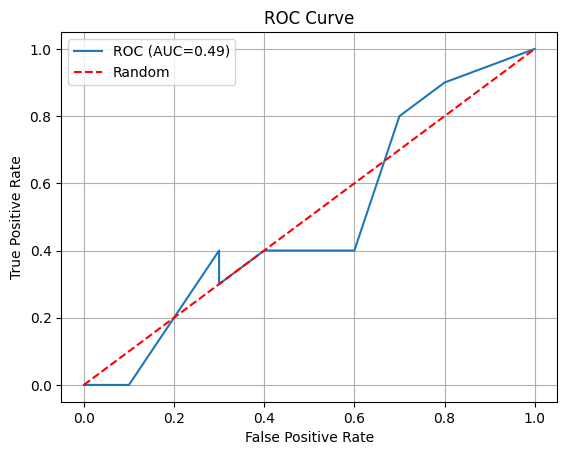

AUC = 0.490


In [19]:
# TODO: Test the plotting function on the TPR and FPR you just calculated.

common_test_features = []
common_test_labels   = []  # 1 => Versicolor, 0 => Setosa

# Ajout des échantillons test de setosa => label=0
for x in iris_setosa.test.features:
    common_test_features.append(x)
    common_test_labels.append(0)

# Ajout des échantillons test de versicolor => label=1
for x in iris_versicolor.test.features:
    common_test_features.append(x)
    common_test_labels.append(1)

common_test_features = np.array(common_test_features)
common_test_labels   = np.array(common_test_labels)

# Pour chaque x, on calcule prob(=Versicolor).
# probVersi = priorVersi * PDF(x|versi)
# probSetosa = priorSetosa * PDF(x|setosa)
# => le score "positive" = probVersi / (probSetosa+probVersi) ou juste probVersi
#   Tant qu'on est cohérent, ça ira pour tracer la ROC.

prediction_probabilities = []
for x in common_test_features:
    probS = naive_bayes_prediction(iris_setosa.train.means,
                                   iris_setosa.train.std_devs,
                                   iris_setosa.train.prior, x)
    probV = naive_bayes_prediction(iris_versicolor.train.means,
                                   iris_versicolor.train.std_devs,
                                   iris_versicolor.train.prior, x)
    # On prend la partie "positive" => Versicolor
    # (on pourrait normaliser, ex. probV / (probS+probV), ou juste probV)
    # -> Pour la ROC, un score plus élevé => plus de prob d'être Versi
    # scoreV = probV / (probV + probS)  # normalisé

    log_probS = np.log(probS) if probS > 0 else -np.inf
    log_probV = np.log(probV) if probV > 0 else -np.inf

    scoreV = np.exp(log_probV - np.logaddexp(log_probV, log_probS))
    
    prediction_probabilities.append(scoreV)

TPR_vals, FPR_vals = TPR_and_FPR(prediction_probabilities, common_test_labels, threshold_stepsize=0.1)
plot_ROC(TPR_vals, FPR_vals)

## Cross-validation

The final task is to take everything you have implemented so far and apply it in a cross-validation loop.

**Note 1:** To better reflect a real scenarios, you should shuffle the data before doing cross-validation.

**Note 2:** When using cross-validation, the interesting thing is the mean performance (mean AUC, mean accuracy, mean ROC-curve).

**Note 3:** This part is a bit more free in terms of implementation, but make sure to use some of the previously implemented functions.

### 10) Cross-validation loop

In [20]:
def cross_validation(features, labels, folds=5, threshold_stepsize=0.1):
    """
    features: shape (N,4), labels: shape (N,) => 0 ou 1
    On fait un k-fold, calcule TPR/FPR à chaque fois et on prend la moyenne.
    """
    N = len(labels)
    indices = np.arange(N)
    np.random.shuffle(indices)

    fold_size = N // folds
    TPR_all = []
    FPR_all = []

    for i in range(folds):
        start = i*fold_size
        end = (i+1)*fold_size if (i<folds-1) else N

        test_idx = indices[start:end]
        train_idx = np.concatenate((indices[:start], indices[end:]))

        X_test  = features[test_idx]
        y_test  = labels[test_idx]
        X_train = features[train_idx]
        y_train = labels[train_idx]

        # Séparer les deux classes dans X_train
        X0 = X_train[y_train==0]
        X1 = X_train[y_train==1]

        n0 = len(X0)
        n1 = len(X1)
        total = n0 + n1

        prior0 = n0/total
        prior1 = n1/total

        # Stats
        m0, s0 = calculate_feature_statistics(X0)
        m1, s1 = calculate_feature_statistics(X1)

        # On calcule prob(=1) pour X_test
        fold_scores = []
        for x in X_test:
            score0 = naive_bayes_prediction(m0, s0, prior0, x)
            score1 = naive_bayes_prediction(m1, s1, prior1, x)
            # On prend "classe 1" comme positive => on renvoie un score plus élevé si c'est la classe 1
            # Normalisation
            if (score0+score1) > 0:
                score_pos = score1 / (score1 + score0)
            else:
                score_pos = 0.5
            fold_scores.append(score_pos)

        TPR_fold, FPR_fold = TPR_and_FPR(fold_scores, y_test, threshold_stepsize)
        TPR_all.append(TPR_fold)
        FPR_all.append(FPR_fold)

    # Moyenne
    TPR_all = np.array(TPR_all)
    FPR_all = np.array(FPR_all)

    mean_TPR = np.mean(TPR_all, axis=0)
    mean_FPR = np.mean(FPR_all, axis=0)
    return mean_TPR, mean_FPR

### 11) 10-fold Cross-validation on all classes

Test the "cross_validation" function on all the classes against eachother using 10 folds.

* Iris-setosa vs Iris-versicolor
* Iris-setosa vs Iris-virginica
* Iris-versicolor vs Iris-virginica

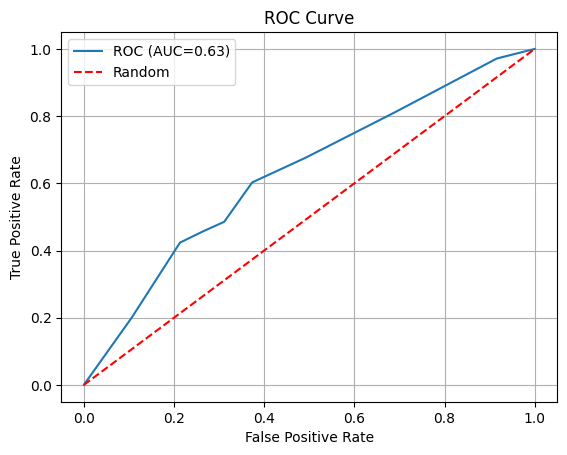

AUC = 0.630


In [21]:
# TODO: Implement and test cross-validation function on all classes.
X_bin = np.vstack((iris_setosa.train.features, iris_versicolor.train.features))
y_bin = np.concatenate((
    np.zeros(len(iris_setosa.train.features), dtype=int),
    np.ones(len(iris_versicolor.train.features), dtype=int)
))

meanTPR, meanFPR = cross_validation(X_bin, y_bin, folds=5, threshold_stepsize=0.1)
plot_ROC(meanTPR, meanFPR)

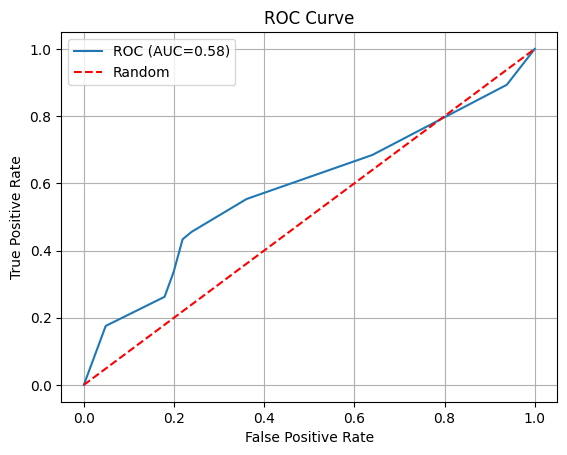

AUC = 0.583


In [22]:
# TODO: Implement and test cross-validation function on all classes.
X_bin = np.vstack((iris_setosa.train.features, iris_virginica.train.features))
y_bin = np.concatenate((
    np.zeros(len(iris_setosa.train.features), dtype=int),
    np.ones(len(iris_virginica.train.features), dtype=int)
))

meanTPR, meanFPR = cross_validation(X_bin, y_bin, folds=5, threshold_stepsize=0.1)
plot_ROC(meanTPR, meanFPR)

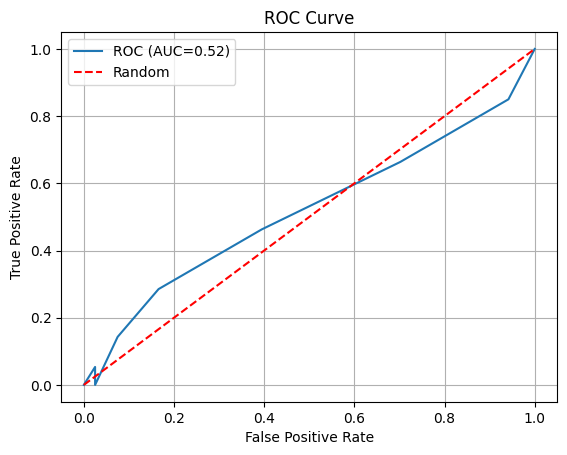

AUC = 0.518


In [23]:
# TODO: Implement and test cross-validation function on all classes.
X_bin = np.vstack((iris_versicolor.train.features, iris_virginica.train.features))
y_bin = np.concatenate((
    np.zeros(len(iris_versicolor.train.features), dtype=int),
    np.ones(len(iris_virginica.train.features), dtype=int)
))

meanTPR, meanFPR = cross_validation(X_bin, y_bin, folds=5, threshold_stepsize=0.1)
plot_ROC(meanTPR, meanFPR)

# Questions for examination:

In addition to completing the assignment with all its tasks, you should also prepare to answer the following questions:

1) Why is it called "naive bayes"?

2) What are some downsides of the naive bayes learning algorithm?

3) When using ROC-curves, what is the theoretical best and worst result you can get?

4) When using ROC-curves, in this assignment for example, is a higher threshold-stepsize always better?  

5) When using cross-validation and ROC-curves, why is it important to take the correct mean values? What could go wrong?


# Finished!

Was part of the setup incorrect? Did you spot any inconsistencies in the assignment? Could something improve?

If so, please write them and send via email and send it to:

* marcus.gullstrand@ju.se

Thank you!